<a href="https://colab.research.google.com/github/khangle2002/ailearningandprojects/blob/main/Date_43_47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 43

Create Schema
```
CREATE SCHEMA `stock` ;
```
Breadown into two tables
```
CREATE TABLE `stock`.`transaction` (
  `transaction_id` INT NOT NULL,
  `customer_name` VARCHAR(100) NOT NULL,
  `transaction_date` DATE NOT NULL,
  PRIMARY KEY (`transaction_id`));
```
```
CREATE TABLE `stock`.`transaction_stock` (
  `transaction_id` INT NOT NULL,
  `stock_codes` VARCHAR(5) NOT NULL,
  PRIMARY KEY (`transaction_id`, `stock_codes`),
  CONSTRAINT `transaction_id`
    FOREIGN KEY (`transaction_id`)
    REFERENCES `stock`.`transaction` (`transaction_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION);
```
**Write a query to retrieve a list of customers along with the stock codes they have traded.**
```
SELECT t.customer_name, s.stock_code
FROM Transaction t
JOIN transaction_stock s ON t.transaction_id = s.transaction_id
```
**Update the customer name "Nguyen Van A" to "Nguyen V. A".**
```
UPDATE `AIO-2025`.`transaction` SET `customer_name` = 'Nguyen V. A' WHERE (`transaction_id` = '1');
```
**Delete the stock code MWG from the transaction associated with customer "Nguyen V. A".**
```
DELETE FROM `AIO-2025`.`transaction_stock` WHERE (`transaction_id` = '1') and (`stock_code` = 'MWG');
```
**Count the number of distinct stock codes each customer has traded.**
```
SELECT t.customer_name, count(stock_code)
FROM transaction t
JOIN transaction_stock s ON t.transaction_id = s.transaction_id
GROUP BY t.customer_name
```
**Find the customer who has traded the most stock codes.**
```
SELECT t.customer_name, count(stock_code)
FROM transaction t
JOIN transaction_stock s ON t.transaction_id = s.transaction_id
GROUP BY t.customer_name
ORDER BY count(stock_code) DESC
LIMIT 1
```


# DAY 44

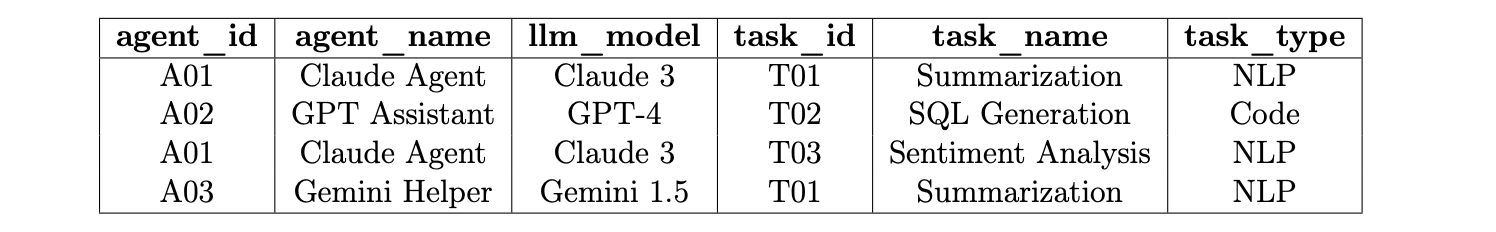

**1. Identify the primary key of the table AgentTask_Raw**



> The two primary keys of the table are `agent_id` and `task_id`. One agent can perform different tasks, and each task can be performed by multiple agent - This is many-to-many relationship



**2. Does this table violate 2NF? If yes, specify which attributes are partially dependent.**

> The table does violate 2NF, as:
>
> * `agent_name` and `llm_model` depend only on the `agent_id`
> * `task_name` and `task_type` depend only on the `task_id`
>
> Generally, those attributes do not depend fully on the composite key (`agent_id` and `task_id`) so the table violates the 2NF  


**3. Normalize the table to 2NF.**

> Split the `AgentTask_Raw` into 3 tables by
>
> Creating the `agents` table
>
> ```
CREATE TABLE `ai-agent`.`agents` (
  `agent_id` VARCHAR(10) NOT NULL,
  `agent_name` VARCHAR(100) NOT NULL,
  `llm_model` VARCHAR(45) NOT NULL,
  PRIMARY KEY (`agent_id`));
>```
>> Insert data into `agents` table
>>```
INSERT INTO `ai-agent`.`agents` (`agent_id`, `agent_name`, `llm_model`) VALUES ('A01', 'Claude Agent', 'Claude 3');
INSERT INTO `ai-agent`.`agents` (`agent_id`, `agent_name`, `llm_model`) VALUES ('A02', 'GPT Assistant', 'GPT-4');
INSERT INTO `ai-agent`.`agents` (`agent_id`, `agent_name`, `llm_model`) VALUES ('A03', 'Gemini Helper', 'Gemini 1.5');
>>```
>
> Creating the `tasks` table
> ```
CREATE TABLE `ai-agent`.`tasks` (
  `task_id` VARCHAR(10) NOT NULL,
  `task_name` VARCHAR(100) NOT NULL,
  `task_type` VARCHAR(45) NOT NULL,
  PRIMARY KEY (`task_id`));
>```
>> Insert data into `tasks` table
>>```
INSERT INTO `ai-agent`.`tasks` (`task_id`, `task_name`, `task_type`) VALUES ('T01', 'Summarization', 'NLP');
INSERT INTO `ai-agent`.`tasks` (`task_id`, `task_name`, `task_type`) VALUES ('T02', 'SQL Generation', 'Code');
INSERT INTO `ai-agent`.`tasks` (`task_id`, `task_name`, `task_type`) VALUES ('T03', 'Sentiment Analysis', 'NLP');
>>```
>
> Creating the `agent-tasks` table
> ```
CREATE TABLE `ai-agent`.`agent_tasks` (
  `agent_id` VARCHAR(10) NOT NULL,
  `task_id` VARCHAR(10) NOT NULL,
  PRIMARY KEY (`agent_id`, `task_id`),
  FOREIGN KEY (`agent_id`) REFERENCES `ai-agent`.`agents` (`agent_id`),
  FOREIGN KEY (`task_id`) REFERENCES `ai-agent`.`tasks` (`task_id`));
>```
>> Insert data into `agent-tasks` table
>>```
INSERT INTO `ai-agent`.`agent_tasks` (`agent_id`, `task_id`) VALUES ('A01', 'T01');
INSERT INTO `ai-agent`.`agent_tasks` (`agent_id`, `task_id`) VALUES ('A01', 'T03');
INSERT INTO `ai-agent`.`agent_tasks` (`agent_id`, `task_id`) VALUES ('A02', 'T02');
INSERT INTO `ai-agent`.`agent_tasks` (`agent_id`, `task_id`) VALUES ('A03', 'T01');
>>```
>




**4. Describe the resulting tables after normalization: table names, columns, primary and foreign keys.**

> Illustrated in the above SQL


**5. Query tasks:**

**a) Retrieve the list of tasks and the corresponding Agent names.**
> Answer
>```
SELECT t.task_name, a.agent_name
FROM agent_tasks at
JOIN agents a ON at.agent_id = a.agent_id
JOIN tasks t ON at.task_id = t.task_id;
>```
>
**b) Retrieve the list of LLM models currently in use.**
> Answer
>```
SELECT DISTINCT llm_model
FROM agents;
>```
>
**c) Count the number of tasks per type (task_type).**
> Answer
>```
SELECT task_type, COUNT(task_type) AS task_count
FROM tasks
GROUP BY task_type;
>```
>
**d) Find the Agents that use LLMs with names starting with the letter G.**
> Answer
>```
SELECT agent_name
FROM agents
WHERE agent_name LIKE "G%";
>```
>

# Day 45

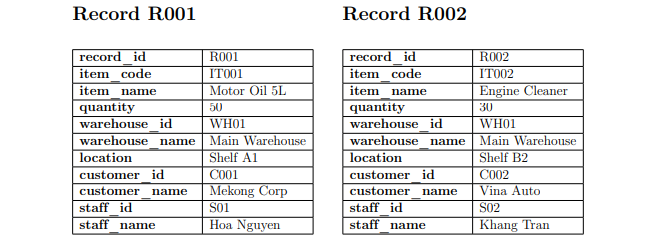
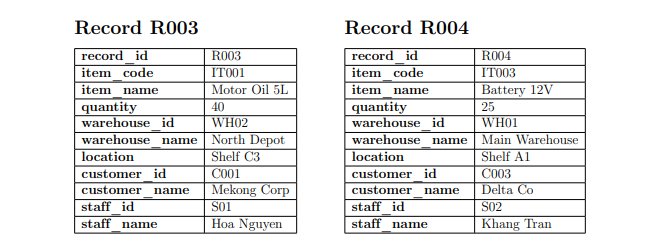

**1.Identify the primary key of the table `StorageRecords_Raw`**
> The primary key of the table `StorageRecords_Raw` is `record_id`

**2.Analyze the normalization violations:**

**a. Has the table satisfied 1NF? If not, what should be adjusted?**
> The table has satisfied the 1NF because:
> * All attributes contain atomic values
> * No multi-value fields

**b. Are there any attributes violating 2NF? If yes, which ones?**
> There are no attributes violating the 2NF because:
> * There is no composite key
> * There is no partial dependencies

**c. Are there any attributes violating 3NF? If yes, which ones and why?**
> There are transitive dependencies, so there is a 3NF violations:
> * `item_name` depends on `item_code` -> Should be in a separate `item` table
> * `warehouse_name` depends on `warehouse_id` -> Transitive dependency via `warehouse_id`
> * `customer_name` depends on `customer_id` -> Should be in a sepeate `customer` table
> * `staff_name` depends on `staff_id` -> Should be in a seperate `customer` table

**3. Normalize the table up to 3NF:**
> Create `storage-record` schema
> ```
CREATE SCHEMA `storage-record` ;
>```
> Create `items` table
>```
CREATE TABLE `storage-record`.`items` (
  `item_code` VARCHAR(10) NOT NULL,
  `item_name` VARCHAR(100) NOT NULL,
  PRIMARY KEY (`item_code`));
>```
> Create `warehouses` table
>```
CREATE TABLE `storage-record`.`warehouses` (
  `warehouse_id` VARCHAR(10) NOT NULL,
  `warehouse_name` VARCHAR(100) NOT NULL,
  PRIMARY KEY (`warehouse_id`));
>```
> Create `customers` table
> ```
CREATE TABLE `storage-record`.`customers` (
  `customer_id` VARCHAR(10) NOT NULL,
  `customer_name` VARCHAR(100) NOT NULL,
  PRIMARY KEY (`customer_id`));
> ```
> Create `staffs` table
>```
CREATE TABLE `storage-record`.`staffs` (
  `staff_id` VARCHAR(10) NOT NULL,
  `staff_name` VARCHAR(100) NOT NULL,
  PRIMARY KEY (`staff_id`));
> ```
> Create `records` table:
>```
CREATE TABLE `storage-record`.`records` (
  `record_id` VARCHAR(10) NOT NULL,
  `item_code` VARCHAR(10) NOT NULL,
  `quantity` INT NOT NULL,
  `warehouse_id` VARCHAR(10) NOT NULL,
  `location` VARCHAR(100) NOT NULL,
  `customer_id` VARCHAR(10) NOT NULL,
  `staff_id` VARCHAR(10) NOT NULL,
  PRIMARY KEY (`record_id`),
  FOREIGN KEY (`item_code`) REFERENCES `storage-record`.`items` (`item_code`)
  FOREIGN KEY (`warehouse_id`) REFERENCES `storage-record`.`warehouses` (`warehouse_id`)
  FOREIGN KEY (`customer_id`) REFERENCES `storage-record`.`customers` (`customer_id`)
  FOREIGN KEY (`staff_id`) REFERENCES `storage-record`.`staffs` (`staff_id`));
>```

**4. SQL Queries**
> Prepare data
>```
INSERT INTO `storage-record`.`items` (`item_code`, `item_name`) VALUES ('IT001', 'Motor Oil 5L');
INSERT INTO `storage-record`.`items` (`item_code`, `item_name`) VALUES ('IT002', 'Engine Cleaner');
INSERT INTO `storage-record`.`items` (`item_code`, `item_name`) VALUES ('IT003', 'Battery 12V');
>```
>```
INSERT INTO `storage-record`.`warehouses` (`warehouse_id`, `warehouse_name`) VALUES ('WH01', 'Main Warehouse');
INSERT INTO `storage-record`.`warehouses` (`warehouse_id`, `warehouse_name`) VALUES ('WH02', 'North Depot');
>```
>```
INSERT INTO `storage-record`.`customers` (`customer_id`, `customer_name`) VALUES ('C001', ' Mekong Corp');
INSERT INTO `storage-record`.`customers` (`customer_id`, `customer_name`) VALUES ('C002', ' Vina Auto');
INSERT INTO `storage-record`.`customers` (`customer_id`, `customer_name`) VALUES ('C003', 'Delta Co');
>```
>```
INSERT INTO `storage-record`.`staffs` (`staff_id`, `staff_name`) VALUES ('S01', 'Hoa Nguyen');
INSERT INTO `storage-record`.`staffs` (`staff_id`, `staff_name`) VALUES ('S02', 'Khang Tran');
>```
>```
INSERT INTO `storage-record`.`records` (`record_id`, `item_code`, `quantity`, `warehouse_id`, `location`, `customer_id`, `staff_id`) VALUES ('R001', 'IT001', '50', 'WH01', 'Shelf A1', 'C001', 'S01');
INSERT INTO `storage-record`.`records` (`record_id`, `item_code`, `quantity`, `warehouse_id`, `location`, `customer_id`, `staff_id`) VALUES ('R002', 'IT002', '30', 'WH01', 'Shelf B2', 'C002', 'S02');
INSERT INTO `storage-record`.`records` (`record_id`, `item_code`, `quantity`, `warehouse_id`, `location`, `customer_id`, `staff_id`) VALUES ('R003', 'IT001', '40', 'WH02', 'Shelf C3', 'C001', 'S01');
INSERT INTO `storage-record`.`records` (`record_id`, `item_code`, `quantity`, `warehouse_id`, `location`, `customer_id`, `staff_id`) VALUES ('R004', 'IT003', '25', 'WH01', 'Shelf A1', 'C003', 'S02');
>```

**4.1 List the total quantity of each item in each warehouse**
> Answer
>```
SELECT warehouse_name, item_name, sum(quantity) as total_quantity
FROM records r
JOIN items it ON it.item_code = r.item_code
JOIN warehouses w ON w.warehouse_id = r.warehouse_id
GROUP BY warehouse_name, item_name;
>```

**4.2 Find customer names and the items they have stored**
> Answer
>```
SELECT customer_name, item_name
FROM records r
JOIN items it ON r.item_code = it.item_code
JOIN customers c ON r.customer_id = c.customer_id
GROUP BY customer_name, item_name;
>```

**4.3 List staff managing records stored in "Main Warehouse"**
> Answer
>```
SELECT DISTINCT staff_name
FROM records r
JOIN staffs s ON s.staff_id = r.staff_id
JOIN warehouses w ON w.warehouse_id = r.warehouse_id
WHERE warehouse_name = "Main Warehouse";
>```

**4.4 Find the storage location of each item in each warehouse**
> Answer
>```
SELECT location, item_name, warehouse_name
FROM records r
JOIN items it ON it.item_code = r.item_code
JOIN warehouses w ON w.warehouse_id = r.warehouse_id;
>```

**4.5 Count the number of unique customers storing items in each warehouse**
> Answer
>```
SELECT warehouse_name, COUNT(DISTINCT customer_id) as No_of_customer
FROM records r
JOIN warehouses w ON r.warehouse_id = w.warehouse_id
GROUP BY warehouse_name;
>```

# DAY 46

**Given two tables:**
```
CREATE SCHEMA `banking` ;
```
```
CREATE TABLE `banking`.`customers` (
  `CustomersID` INT NOT NULL AUTO_INCREMENT,
  `Name` VARCHAR(100) NOT NULL,
  `City` VARCHAR(100) NOT NULL,
  PRIMARY KEY (`CustomersID`));
```
```
CREATE TABLE `banking`.`accounts` (
  `AccountID` VARCHAR(10) NOT NULL,
  `CustomerID` INT NOT NULL,
  `Balance` INT NOT NULL,
  PRIMARY KEY (`AccountID`),
  FOREIGN KEY (`CustomerID`) REFERENCES `banking`.`customers` (`CustomersID`)
);
```
```
INSERT INTO `banking`.`customers` (`CustomersID`, `Name`, `City`) VALUES ('1', 'Alice', 'Hanoi');
INSERT INTO `banking`.`customers` (`CustomersID`, `Name`, `City`) VALUES ('2', 'Bob', 'HCM');
INSERT INTO `banking`.`customers` (`CustomersID`, `Name`, `City`) VALUES ('3', 'Charlie', 'Danang');
INSERT INTO `banking`.`customers` (`CustomersID`, `Name`, `City`) VALUES ('4', 'Diana', 'Hanoi')
```
```
INSERT INTO `banking`.`accounts` (`AccountID`, `CustomerID`, `Balance`) VALUES ('A1', '1', '500');
INSERT INTO `banking`.`accounts` (`AccountID`, `CustomerID`, `Balance`) VALUES ('A2', '1', '1000');
INSERT INTO `banking`.`accounts` (`AccountID`, `CustomerID`, `Balance`) VALUES ('A3', '2', '1500');
INSERT INTO `banking`.`accounts` (`AccountID`, `CustomerID`, `Balance`) VALUES ('A4', '4', '300');
```

**1. List all customers and their accounts if any.**
```
SELECT Customers.CustomerID, Name, City, AccountID, Balance
FROM Customers
LEFT JOIN Accounts ON Customers.CustomerID = Accounts.CustomerID;
```
**2. Show only customers who have at least one account.**
```
SELECT name, account_id, balance
FROM customers c
INNER JOIN accounts a ON c.customer_id = a.customer_id;
```
**3. Show all accounts, even if not linked to any customer.**
```
SELECT a.account_id, a.customer_id, c.name, a.balance
FROM customers c
RIGHT JOIN accounts a ON c.customer_id = a.customer_id;
```
**4. List all possible combinations between customers and accounts.**
```
SELECT a.account_id, a.balance,  c.customer_id, c.name, c.city
FROM customers c
RIGHT JOIN accounts a ON c.customer_id = a.customer_id

UNION

SELECT  a.account_id, a.balance, c.customer_id, c.name, c.city
FROM accounts a
RIGHT JOIN customers c ON c.customer_id = a.customer_id;
```

**5. Find customers who do not have any account.**
```
SELECT c.customer_id, c.name, c.city
FROM customers c
LEFT JOIN accounts a ON c.customer_id = a.customer_id
WHERE a.customer_id IS NULL;
```

**6. Find accounts not linked to any customer.**
```
SELECT a.account_id, a.balance
FROM accounts a
LEFT JOIN customers c ON a.customer_id = c.customer_id
WHERE a.customer_id IS NULL;
```

# DAY 47

**Create schema**
```
CREATE SCHEMA `fashion_store` ;
```

**Create `Category` Table**
```
CREATE TABLE `fashion_store`.`category` (
  `category_id` INT NOT NULL,
  `name` VARCHAR(100) NOT NULL,
  PRIMARY KEY (`category_id`));
```

**Create `customer` Table**
```
CREATE TABLE `fashion_store`.`customer` (
  `customer_id` INT NOT NULL,
  `name` VARCHAR(100) NOT NULL,
  `phone` VARCHAR(45) NOT NULL,
  `address` VARCHAR(45) NOT NULL,
  `created_date` DATE NOT NULL,
  PRIMARY KEY (`customer_id`));
```

**Create `products` Table**
```
CREATE TABLE `fashion_store`.`products` (
  `product_id` INT NOT NULL,
  `name` VARCHAR(100) NULL,
  `category_id` INT NULL,
  `price` INT NULL,
   PRIMARY KEY (`product_id`),
   FOREIGN KEY (`category_id`) REFERENCES `fashion_store`.`category` (`category_id`)
);
```

**Create `variant` Table**
```
CREATE TABLE `fashion_store`.`variant` (
  `variant_id` INT NOT NULL,
  `product_id` INT NOT NULL,
  `color` VARCHAR(45) NOT NULL,
  `size` VARCHAR(10) NOT NULL,
  `stock` INT NOT NULL,
  PRIMARY KEY (`variant_id`),
  FOREIGN KEY (`product_id`) REFERENCES `fashion_store`.`products` (`product_id`)
);
```

**Create `orders` Table**
```
CREATE TABLE `fashion_store`.`orders` (
  `order_id` INT NOT NULL,
  `customer_id` INT NOT NULL,
  `order_date` DATE NOT NULL,
  `status` VARCHAR(45) NOT NULL,
  PRIMARY KEY (`order_id`),
  CONSTRAINT `customer_id`
  FOREIGN KEY (`customer_id`) REFERENCES `fashion_store`.`customer` (`customer_id`)
);
```

**Create `order_detail` table**
```
CREATE TABLE `fashion_store`.`order_detail` (
  `order_id` INT NOT NULL,
  `variant_id` INT NOT NULL,
  `quantity` INT NOT NULL,
  `price` INT NOT NULL,
  PRIMARY KEY (`order_id`, `variant_id`),
  FOREIGN KEY (`order_id`) REFERENCES `fashion_store`.`orders` (`order_id`),
  FOREIGN KEY (`variant_id`) REFERENCES `fashion_store`.`variant` (`variant_id`)
);
```

**Insert data for `category` table**
```
INSERT INTO `fashion_store`.`category` (`category_id`, `name`) VALUES ('1', 'Áo ');
INSERT INTO `fashion_store`.`category` (`category_id`, `name`) VALUES ('2', 'Quần');
INSERT INTO `fashion_store`.`category` (`category_id`, `name`) VALUES ('3', 'Váy');
INSERT INTO `fashion_store`.`category` (`category_id`, `name`) VALUES ('4', 'Phụ kiện');
```

**Insert data for `customer` table**
```
INSERT INTO `fashion_store`.`customer` (`customer_id`, `name`, `phone`, `address`, `created_date`) VALUES ('1', 'Trần An', '0909123456', 'Hà Nội', '2024-01-10');
INSERT INTO `fashion_store`.`customer` (`customer_id`, `name`, `phone`, `address`, `created_date`) VALUES ('2', 'Lê Bình', '0909223456', 'TP.HCM', '2024-02-05');
```

**Insert data for `products` table**
```
INSERT INTO `fashion_store`.`products` (`product_id`, `name`, `category_id`, `price`) VALUES ('101', 'Áo sơ mi nam', '1', '300000');
INSERT INTO `fashion_store`.`products` (`product_id`, `name`, `category_id`, `price`) VALUES ('102', 'Quần jeans', '2', '500000');
INSERT INTO `fashion_store`.`products` (`product_id`, `name`, `category_id`, `price`) VALUES ('103', 'Váy xòe', '3', '450000');

```

**Insert data for `variant` table**
```
INSERT INTO `fashion_store`.`variant` (`variant_id`, `product_id`, `color`, `size`, `stock`) VALUES ('1', '101', 'Trắng ', 'M', '20');
INSERT INTO `fashion_store`.`variant` (`variant_id`, `product_id`, `color`, `size`, `stock`) VALUES ('2', '101', 'Trắng ', 'L', '15');
INSERT INTO `fashion_store`.`variant` (`variant_id`, `product_id`, `color`, `size`, `stock`) VALUES ('3', '102', 'Xanh ', 'M', '10');
INSERT INTO `fashion_store`.`variant` (`variant_id`, `product_id`, `color`, `size`, `stock`) VALUES ('4', '103', 'Đỏ', 'S', '5');
```

**Insert data for `orders` table**
```
INSERT INTO `fashion_store`.`orders` (`order_id`, `customer_id`, `order_date`, `status`) VALUES ('1', '1', '2024-03-01', 'Đã giao');
INSERT INTO `fashion_store`.`orders` (`order_id`, `customer_id`, `order_date`, `status`) VALUES ('2', '2', '2024-03-02', 'Đã đặt');
```


**Insert data for `order_detail` table**
```
INSERT INTO `fashion_store`.`order_detail` (`order_id`, `variant_id`, `quantity`, `price`) VALUES ('1', '1', '2', '300000');
INSERT INTO `fashion_store`.`order_detail` (`order_id`, `variant_id`, `quantity`, `price`) VALUES ('1', '3', '1', '500000');
INSERT INTO `fashion_store`.`order_detail` (`order_id`, `variant_id`, `quantity`, `price`) VALUES ('2', '4', '1', '450000');
```

**1. List all orders with customer name and total order amount**
```
SELECT o.order_id, o.customer_id, c.name, SUM(od.price * od.quantity) AS price,
o.order_date, o.status
FROM orders o
JOIN customer c ON o.customer_id = c.customer_id
JOIN order_detail od ON o.order_id = od.order_id
GROUP BY o.order_id, o.customer_id, c.name, o.order_date, o.status;

```

**2. List products with stock below 10**
```
SELECT p.product_id, p.name, v.color, v.size, v.stock
FROM products p
JOIN variant v ON p.product_id = v.product_id
WHERE stock < 10;
```

**3. Total revenue by order date**
```
SELECT o.order_date as Date, sum(od.quantity * od.price) as Revenue
FROM orders o
JOIN order_detail od ON o.order_id = od.order_id
GROUP BY o.order_date;
```

**4. List customers who have placed at least one order**
```
SELECT c.customer_id, c.name, count(o.order_id) as No_of_order
FROM customer c
JOIN orders o ON c.customer_id= o.customer_id
GROUP BY c.customer_id, c.name
HAVING count(o.order_id) >= 1;
```

**5. List best-selling products by quantity sold**
```
SELECT p.name, v.color, v.size, sum(od.quantity) as quantity_sold
FROM order_detail od
JOIN variant v ON v.variant_id = od.variant_id
JOIN products p ON v.product_id = p.product_id
GROUP BY p.name, v.color, v.size
ORDER BY sum(od.quantity) DESC
LIMIT 1;
```

**6. Total revenue by category**
```
SELECT od.variant_id, cat.category_id, cat.name, sum(od.quantity * od.price) as Revenue
FROM order_detail od
JOIN variant v ON od.variant_id = v.variant_id
JOIN products p ON v.product_id  = p.product_id
JOIN category cat ON p.category_id = cat.category_id
GROUP BY od.variant_id, cat.category_id, cat.name;
```

**7. Show detailed info of an order (product name, color, size, quantity, price, total)**
```
SELECT o.order_id, p.name as product_, v.color, v.size, od.quantity, od.price, od.quantity * od.price as total
FROM orders o
JOIN order_detail od ON o.order_id = od.order_id
JOIN variant v ON v.variant_id = od.variant_id
JOIN products p ON p.product_id = v.product_id
WHERE o.order_id = 1;
```

**8. List customers who have never placed an order**
```
SELECT *
FROM customer
WHERE customer_id NOT IN (SELECT DISTINCT customer_id FROM orders);
```

**9. Count new customers by month**
```
SELECT month(created_date) as Month, count(customer_id) as New_customers
FROM customer
GROUP BY month(created_date);
```

**10. Count orders by status**
```
SELECT status, count(order_id) as No_of_orders
FROM orders
GROUP BY status;
```

**11. Calculate average revenue per product category**
```
SELECT cat.name as category_name, avg(v.stock) as average_stock_by_category
FROM category cat
JOIN products p ON cat.category_id = p.category_id
JOIN variant v ON p.product_id = v. product_id
GROUP BY cat.name;
```